In [39]:
#EDA Project
#Step-1:Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from faker import Faker
import seaborn as sns
from datetime import datetime

In [2]:
!pip install faker

ERROR: Could not find a version that satisfies the requirement faker (from versions: none)
ERROR: No matching distribution found for faker


In [3]:
from faker import Faker
fake=Faker()
print(fake.name())

ModuleNotFoundError: No module named 'faker'

In [6]:
import sys
!{sys.executable} -m pip install faker

  Obtaining dependency information for faker from https://files.pythonhosted.org/packages/4d/1e/e6d1940d2c2617d7e6a0a3fdd90e506ff141715cdc4c3ecd7217d937e656/faker-38.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.0 MB 218.6 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.0 MB 218.6 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.0 MB 218.6 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.0 MB 218.6 kB/s eta 0:00:09
   - ----

In [7]:
from faker import 
fake=Faker()
print(fake.name())

Gary Brown


In [17]:
#Define Base lists
categories={
    "Furniture":["Office Chair","Study Table","Sofa","Bookshelf","Dining Table"],
    "Office Supplies":["Pen","Notebook","Stapler","File Folder","Calculator"],
    "Electronics":["Laptop","Keyboard","Mouse","Headphones","Monitor"],
    "Grocery":["Rice Bag","Cooking Oil","Sugar","Snacks","Juice Pack"]
}
regions=["North","South","East","West"]
payment_modes=["Cash","Credit Card","UPI","Net Banking"]
delivery_status=["Delivered","Pending","Returned","Cancelled"]
customer_segments=["Consumer","Corporate","Home Office"]
                   
#Generate dataset
records=[] #Empty list to store all rows
for i in range(1000):#1000 fake orders
    order_id=f"ORD{1000+i}"
    order_date=fake.date_between(start_date='-2y',end_date='today')
    ship_date=order_date+pd.Timedelta(days=random.randint(1,7))#Timedelta->adding/concating dates
                   
    customer_name=fake.name()
    customer_id=f"CUST{random.randint(100,999)}"
    customer_segment=random.choice(customer_segments)

    category=random.choice(list(categories.keys()))
    product_name=random.choice(categories[category])
    product_id=f"PROD{random.randint(1000,9999)}"
                   
    region=random.choice(regions)
    state=fake.state()
    city=fake.city()
                  
    quantity=random.randint(1,10)
    unit_price=random.randint(100,5000)
    discount=random.choice([0,5,10,15,20])
    
    sales_amount=quantity*unit_price*(1-discount/100)
    cost_price=sales_amount*random.uniform(0.6,0.9)
    profit=sales_amount-cost_price
    
    stock_left=random.randint(0,50)
    
    if stock_left<10:
        auto_reorder="Yes"
        reorder_quantity=random.randint(20,50)
    else:
        auto_reorder="No"
        reorder_quantity=0
    
    supplier_name=fake.company()
    supplier_email=fake.company_email()
    payment_mode=random.choice(payment_modes)
    delivery=random.choice(delivery_status)
    
    #Append row as dictionary
    records.append({
        "Order ID":order_id,
        "Order Date":order_date,
        "Ship Date":ship_date,
        "Customer ID":customer_id,
        "Customer Name":customer_name,
        "Customer Segment":customer_segment,
        "Product ID":product_id,
        "Product Name":product_name,
        "Category":category,
        "Region":region,
        "State":state,
        "City":city,
        "Quantity":quantity,
        "Unit Price":unit_price,
        "Discount (%)":discount,
        "Sales Amount":round(sales_amount,2),
        "Cost Price":round(cost_price,2),
        "Profit":round(profit,2),
        "Payment Mode":payment_mode,
        "Delivery Status":delivery,
        "Supplier Name":supplier_name,
        "Supplier Email":supplier_email,
        "Stock Left":stock_left,
        "Auto Reorder":auto_reorder
    })
    
#Create DataFrame and save to csv
df=pd.DataFrame(records)
try:
    df.to_csv("Superstore_Management_System.csv",index=False)
    print("Dataset generated successfully! File saved as 'Superstore_Management_System.csv'")
except PermissionError:
    print("Please close the file 'Superstore_Management_System.csv' if it is open in excel")

Dataset generated successfully! File saved as 'Superstore_Management_System.csv'


In [20]:
#import dataset
df=pd.read_csv('Superstore_Management_System.csv')
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Discount (%),Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder
0,ORD1000,2024-10-14,2024-10-16,CUST985,Jason Murphy,Home Office,PROD1177,Pen,Office Supplies,West,...,15,19301.8,17208.28,2093.52,Cash,Delivered,"Chase, Koch and Fitzgerald",hunterrebecca@peterson.com,48,No
1,ORD1001,2025-04-29,2025-04-30,CUST435,Ellen Fleming,Home Office,PROD6559,Dining Table,Furniture,South,...,0,6969.0,5804.69,1164.31,Credit Card,Delivered,"Espinoza, Williams and Parker",kari15@sutton-miller.com,10,No
2,ORD1002,2025-07-15,2025-07-22,CUST970,Aaron Best,Consumer,PROD8139,Mouse,Electronics,East,...,15,13328.0,10130.05,3197.95,Net Banking,Delivered,Scott and Sons,carlsonlori@thompson.com,40,No
3,ORD1003,2025-07-07,2025-07-11,CUST997,Douglas Willis,Consumer,PROD1432,Mouse,Electronics,South,...,0,10026.0,9015.56,1010.44,Net Banking,Returned,Johnson-Bernard,april24@mitchell-rice.com,30,No
4,ORD1004,2025-03-01,2025-03-03,CUST923,Kristina Rasmussen,Consumer,PROD8888,Headphones,Electronics,East,...,20,15312.0,9398.16,5913.84,UPI,Delivered,"Thompson, Goodwin and Maynard",wagnerkelly@barker.com,11,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORD1995,2025-03-18,2025-03-22,CUST333,Valerie Smith,Home Office,PROD8102,File Folder,Office Supplies,East,...,20,2899.2,1791.65,1107.55,Net Banking,Pending,"Robinson, Thompson and Mcdonald",riggsjanet@munoz.org,2,Yes
996,ORD1996,2024-02-15,2024-02-19,CUST976,Nicholas Mills,Home Office,PROD2178,Cooking Oil,Grocery,East,...,0,11088.0,9202.79,1885.21,Net Banking,Returned,"Davis, Powell and Taylor",leblancjavier@lynch.com,39,No
997,ORD1997,2024-07-21,2024-07-27,CUST103,Don Green,Corporate,PROD7397,Bookshelf,Furniture,South,...,5,26191.5,22016.00,4175.50,Net Banking,Cancelled,Morris-Foley,ruthedwards@smith.com,48,No
998,ORD1998,2024-09-13,2024-09-14,CUST646,Laura Anthony,Corporate,PROD1427,Pen,Office Supplies,West,...,20,5020.0,4200.57,819.43,Cash,Returned,Andrews-Jones,kmorrow@walker-hernandez.net,31,No


In [21]:
#Finding head
df.head()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Category,Region,...,Discount (%),Sales Amount,Cost Price,Profit,Payment Mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Reorder
0,ORD1000,2024-10-14,2024-10-16,CUST985,Jason Murphy,Home Office,PROD1177,Pen,Office Supplies,West,...,15,19301.8,17208.28,2093.52,Cash,Delivered,"Chase, Koch and Fitzgerald",hunterrebecca@peterson.com,48,No
1,ORD1001,2025-04-29,2025-04-30,CUST435,Ellen Fleming,Home Office,PROD6559,Dining Table,Furniture,South,...,0,6969.0,5804.69,1164.31,Credit Card,Delivered,"Espinoza, Williams and Parker",kari15@sutton-miller.com,10,No
2,ORD1002,2025-07-15,2025-07-22,CUST970,Aaron Best,Consumer,PROD8139,Mouse,Electronics,East,...,15,13328.0,10130.05,3197.95,Net Banking,Delivered,Scott and Sons,carlsonlori@thompson.com,40,No
3,ORD1003,2025-07-07,2025-07-11,CUST997,Douglas Willis,Consumer,PROD1432,Mouse,Electronics,South,...,0,10026.0,9015.56,1010.44,Net Banking,Returned,Johnson-Bernard,april24@mitchell-rice.com,30,No
4,ORD1004,2025-03-01,2025-03-03,CUST923,Kristina Rasmussen,Consumer,PROD8888,Headphones,Electronics,East,...,20,15312.0,9398.16,5913.84,UPI,Delivered,"Thompson, Goodwin and Maynard",wagnerkelly@barker.com,11,No


In [25]:
#finding type
f'Data Type Is :{type(df)}'

"Data Type Is :<class 'pandas.core.frame.DataFrame'>"

In [26]:
#finding data type for each columns
df.dtypes

Order ID             object
Order Date           object
Ship Date            object
Customer ID          object
Customer Name        object
Customer Segment     object
Product ID           object
Product Name         object
Category             object
Region               object
State                object
City                 object
Quantity              int64
Unit Price            int64
Discount (%)          int64
Sales Amount        float64
Cost Price          float64
Profit              float64
Payment Mode         object
Delivery Status      object
Supplier Name        object
Supplier Email       object
Stock Left            int64
Auto Reorder         object
dtype: object

In [27]:
#finding summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Ship Date         1000 non-null   object 
 3   Customer ID       1000 non-null   object 
 4   Customer Name     1000 non-null   object 
 5   Customer Segment  1000 non-null   object 
 6   Product ID        1000 non-null   object 
 7   Product Name      1000 non-null   object 
 8   Category          1000 non-null   object 
 9   Region            1000 non-null   object 
 10  State             1000 non-null   object 
 11  City              1000 non-null   object 
 12  Quantity          1000 non-null   int64  
 13  Unit Price        1000 non-null   int64  
 14  Discount (%)      1000 non-null   int64  
 15  Sales Amount      1000 non-null   float64
 16  Cost Price        1000 non-null   float64
 

In [28]:
#finding out the shape of dataset
f'There are total rows and columns is :{df.shape}'

'There are total rows and columns is :(1000, 24)'

In [29]:
#finding out null values
df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Customer ID         0
Customer Name       0
Customer Segment    0
Product ID          0
Product Name        0
Category            0
Region              0
State               0
City                0
Quantity            0
Unit Price          0
Discount (%)        0
Sales Amount        0
Cost Price          0
Profit              0
Payment Mode        0
Delivery Status     0
Supplier Name       0
Supplier Email      0
Stock Left          0
Auto Reorder        0
dtype: int64

In [35]:
#Convert date columns to datetime
df['Order Date']=pd.to_datetime(df['Order Date'],format='%Y-%m-%d')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%Y-%m-%d')

#Check conversion
print("\nDate columns converted:\n")
print(f"Order Date: {df['Order Date'].dtype}")
print(f"Ship Date: {df['Ship Date'].dtype}")


Date columns converted:

Order Date: datetime64[ns]
Ship Date: datetime64[ns]



=== CATEGORICAL VARIABLES ===


--- Customer Segment ---
Customer Segment
Home Office    341
Consumer       334
Corporate      325
Name: count, dtype: int64


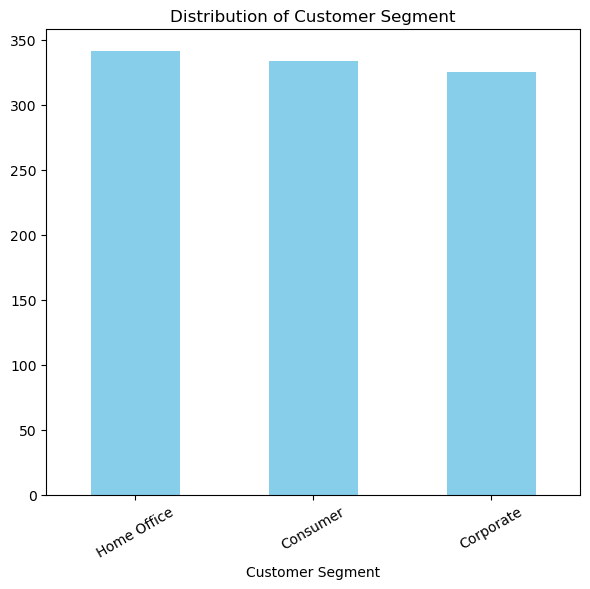


--- Category ---
Category
Office Supplies    257
Grocery            256
Electronics        249
Furniture          238
Name: count, dtype: int64


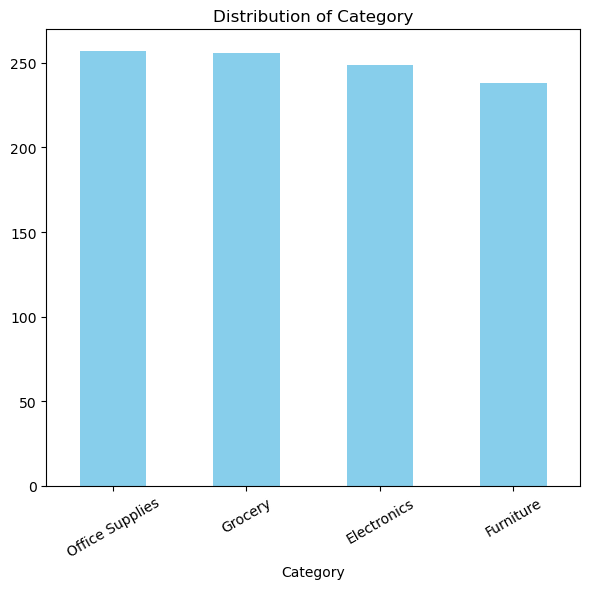


--- Region ---
Region
East     310
North    247
West     230
South    213
Name: count, dtype: int64


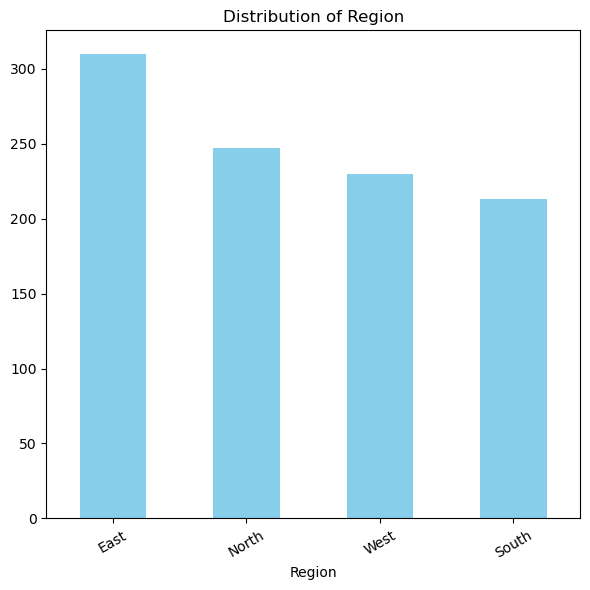


--- Payment Mode ---
Payment Mode
Cash           280
UPI            262
Net Banking    230
Credit Card    228
Name: count, dtype: int64


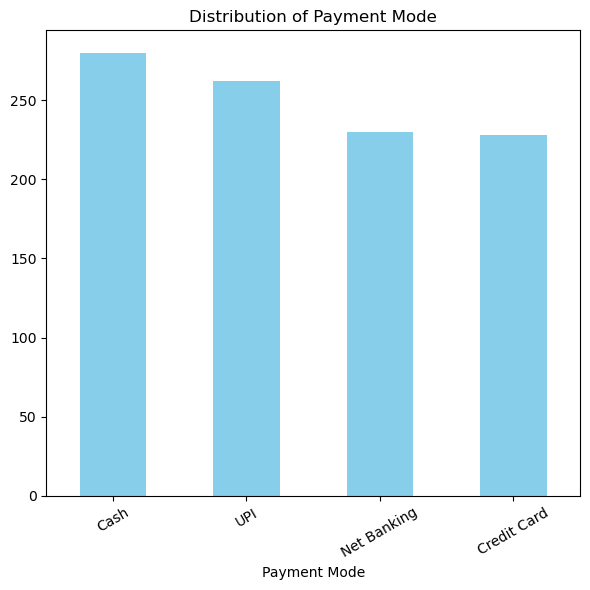


--- Delivery Status ---
Delivery Status
Pending      261
Returned     253
Cancelled    248
Delivered    238
Name: count, dtype: int64


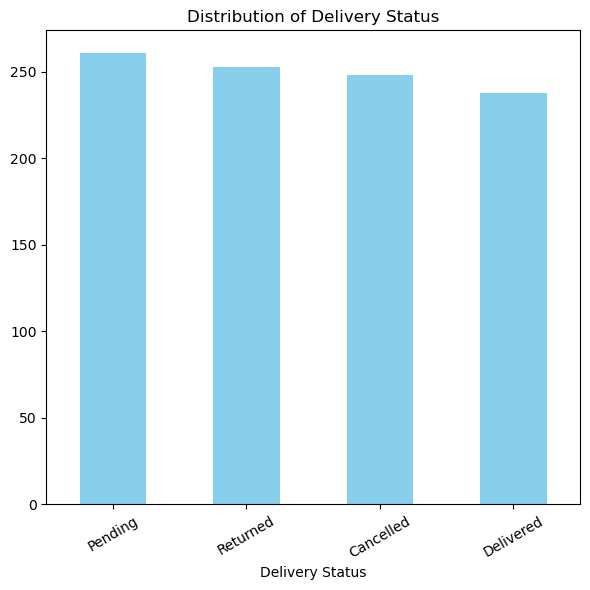


--- Auto Reorder ---
Auto Reorder
No     811
Yes    189
Name: count, dtype: int64


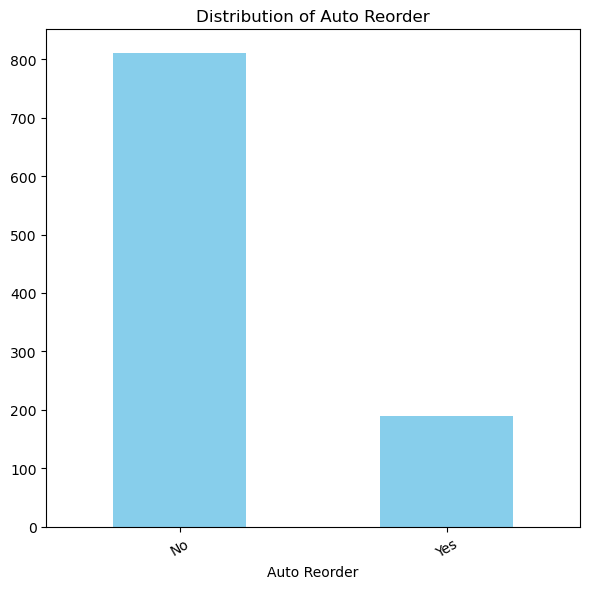

In [42]:
#Univariate Analysis
#Univariate analysis is the simplest form of statistical analysis.As the name suggests-"uni" 
#means "one" and "variate" means it is the analysis of a single variable

print("\n=== CATEGORICAL VARIABLES ===\n")
categorical_cols=['Customer Segment','Category','Region','Payment Mode','Delivery Status','Auto Reorder']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    
    #visualization
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    #value_counts()->counts how many times each unique value appears in a column.It basically gives the frequency distribution of the values


=== NUMERICAL VARIABLES ===


--- Quantity ---

mean: 5.57
median: 6.00
Std Dev: 2.89
min: 1.00
max: 10.00


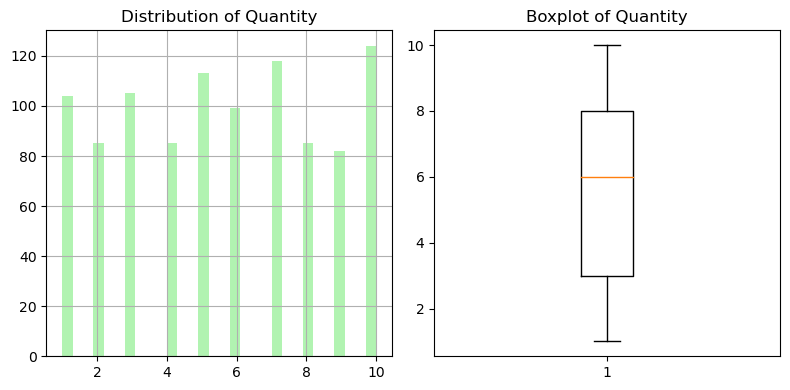


--- Unit Price ---

mean: 2540.54
median: 2540.50
Std Dev: 1421.43
min: 104.00
max: 4985.00


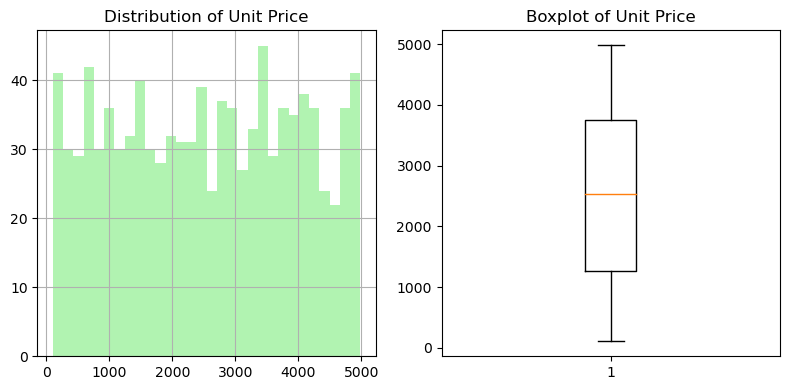


--- Discount (%) ---

mean: 10.13
median: 10.00
Std Dev: 7.38
min: 0.00
max: 20.00


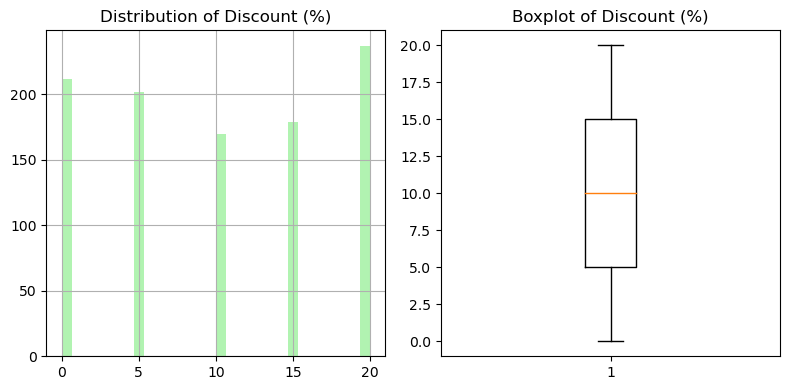


--- Sales Amount ---

mean: 12901.32
median: 10283.60
Std Dev: 10644.55
min: 142.00
max: 46130.00


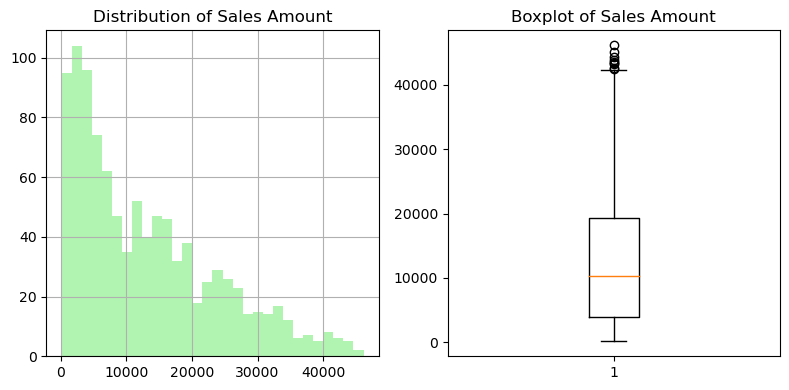


--- Cost Price ---

mean: 9735.21
median: 7508.65
Std Dev: 8176.84
min: 90.04
max: 37239.88


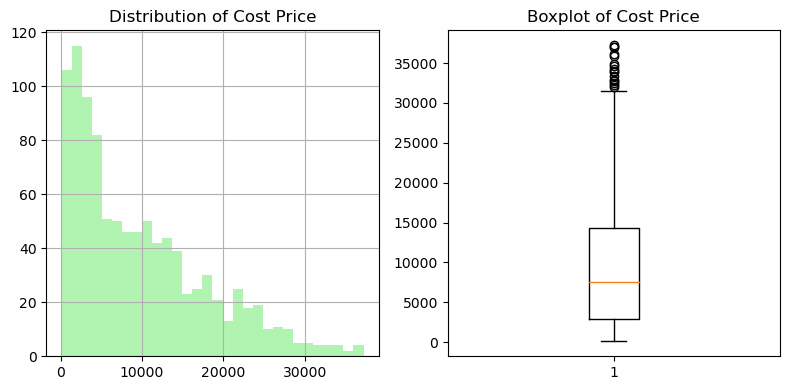


--- Profit ---

mean: 3166.11
median: 2258.42
Std Dev: 2964.53
min: 25.76
max: 17487.17


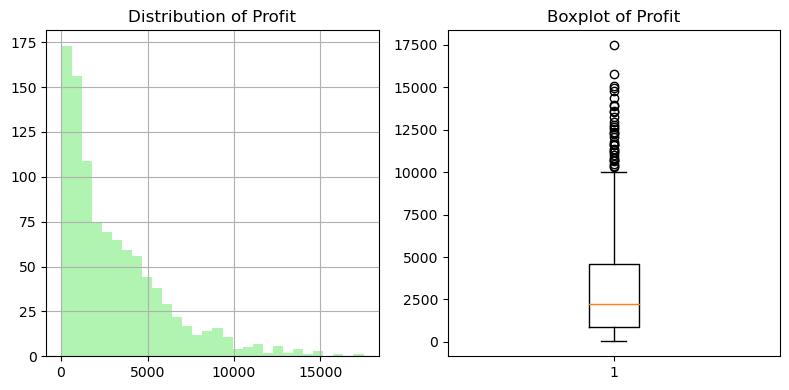


--- Stock Left ---

mean: 24.89
median: 25.00
Std Dev: 14.51
min: 0.00
max: 50.00


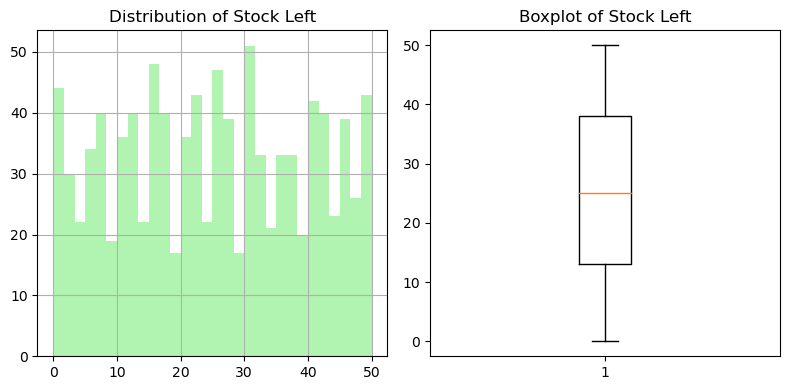

In [50]:
#Numerical Variables Analysis
print("\n=== NUMERICAL VARIABLES ===\n")

numerical_cols=['Quantity','Unit Price','Discount (%)','Sales Amount','Cost Price','Profit','Stock Left']

for col in numerical_cols:
    print(f"\n--- {col} ---\n")
    print(f"mean: {df[col].mean():.2f}")
    print(f"median: {df[col].median():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"min: {df[col].min():.2f}")
    print(f"max: {df[col].max():.2f}")
    
    #Visualization
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=30,color='lightgreen',alpha=0.7)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


=== SALES & PROFIT BY CATEGORY ===

                 Sales Amount     Profit  Order Count  Profit Margin
Category                                                            
Electronics        3466061.95  830055.09          249      23.948074
Furniture          3063964.25  763308.60          238      24.912451
Grocery            3151464.75  800115.85          256      25.388697
Office Supplies    3219826.90  772627.63          257      23.995937 




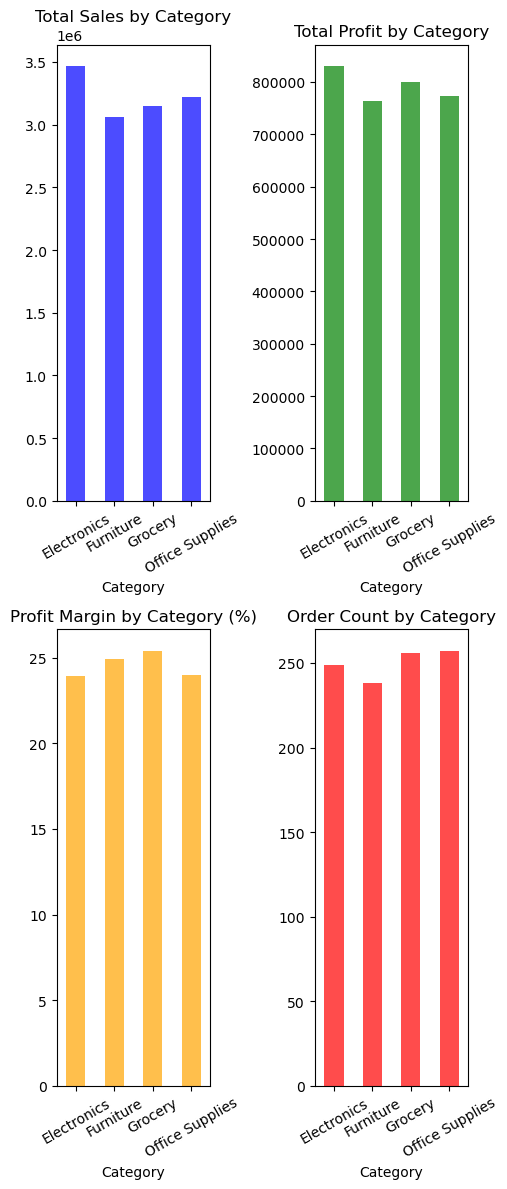

In [53]:
#Bivariate Analysis
#Bivariate Analysys is the statistical analysis of two variables at the same time.The core purpose is to investigate the relationship
#between them
print("\n=== SALES & PROFIT BY CATEGORY ===\n")

category_performance=df.groupby('Category').agg({
    'Sales Amount':'sum',
    'Profit':'sum',
    'Order ID':'count'
}).rename(columns={'Order ID':'Order Count'})

category_performance['Profit Margin']=(category_performance['Profit']/category_performance['Sales Amount'])*100
print(category_performance,'\n\n')

#visualization
fig,axes=plt.subplots(2,2,figsize=(5,12))

#Sales by category
category_performance['Sales Amount'].plot(kind='bar',ax=axes[0,0],color='blue',alpha=0.7)
axes[0,0].set_title('Total Sales by Category')
axes[0,0].tick_params(axis='x',rotation=30)

#Profit by Category
category_performance['Profit'].plot(kind='bar',ax=axes[0,1],color='green',alpha=0.7)
axes[0,1].set_title('Total Profit by Category')
axes[0,1].tick_params(axis='x',rotation=30)

#Profit Margin
category_performance['Profit Margin'].plot(kind='bar',ax=axes[1,0],color='orange',alpha=0.7)
axes[1,0].set_title('Profit Margin by Category (%)')
axes[1,0].tick_params(axis='x',rotation=30)

#Order Count
category_performance['Order Count'].plot(kind='bar',ax=axes[1,1],color='red',alpha=0.7)
axes[1,1].set_title('Order Count by Category')
axes[1,1].tick_params(axis='x',rotation=30)

plt.tight_layout()
plt.show()


===REGIONAL PERFORMANCE ===

        Sales Amount     Profit  Order Count  Profit Margin
Region                                                     
East      3811337.00  935481.37          310      24.544704
North     3240435.25  773493.39          247      23.870046
South     2776907.60  689560.92          213      24.831972
West      3072638.00  767571.49          230      24.980863 




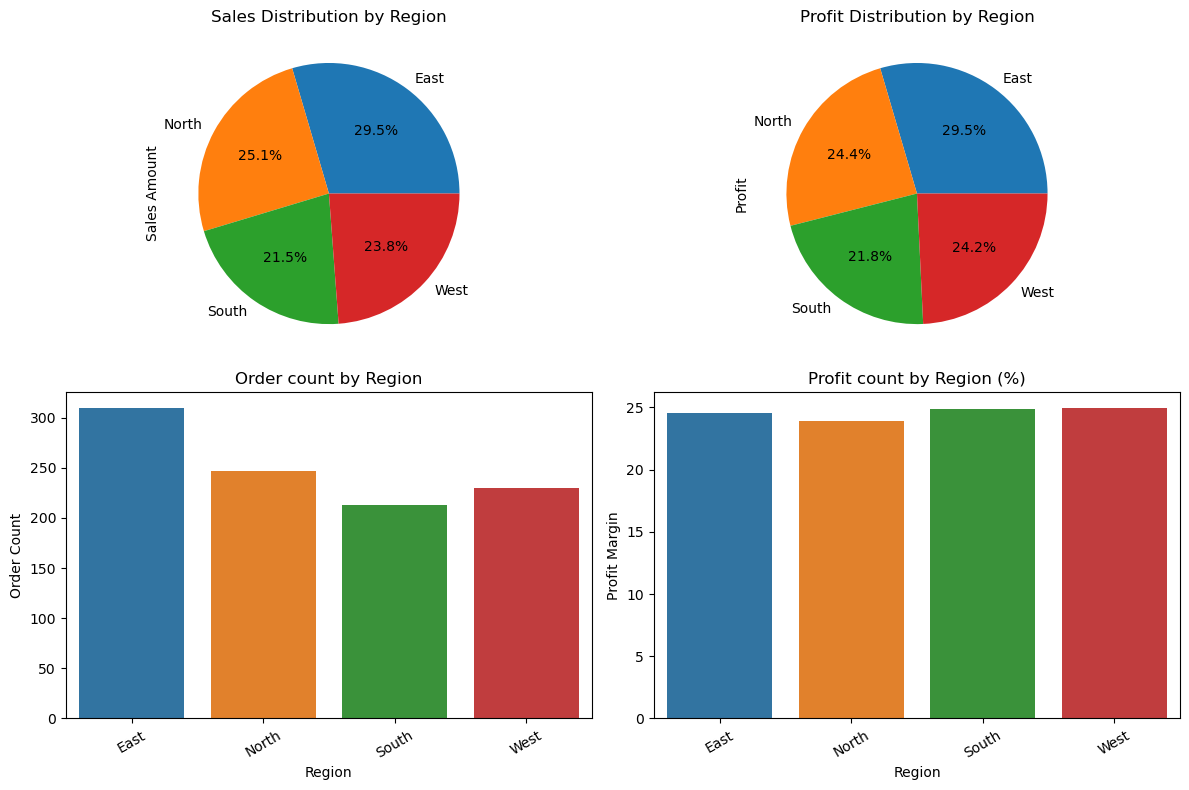

In [56]:
#Regional Performance
print("\n===REGIONAL PERFORMANCE ===\n")

regional_performance=df.groupby('Region').agg({
    'Sales Amount':'sum',
    'Profit':'sum',
    'Order ID':'count'
}).rename(columns={'Order ID':'Order Count'})

regional_performance['Profit Margin']=(regional_performance['Profit']/regional_performance['Sales Amount'])*100
print(regional_performance,'\n\n')

#Visualization
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
regional_performance['Sales Amount'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Sales Distribution by Region')

plt.subplot(2,2,2)
regional_performance['Profit'].plot(kind='pie',autopct='%1.1f%%')
plt.title('Profit Distribution by Region')

plt.subplot(2,2,3)
sns.barplot(x=regional_performance.index,y='Order Count',data=regional_performance)
plt.title('Order count by Region')
plt.xticks(rotation=30)

plt.subplot(2,2,4)
sns.barplot(x=regional_performance.index,y='Profit Margin',data=regional_performance)
plt.title('Profit count by Region (%)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


===REGIONAL PERFORMANCE ===

Monthly Trends:
             Sales Amount     Profit  Order Count
Order Month                                      
2025-02         443983.15  116819.89           30
2025-03         573645.05  149330.75           53
2025-04         501823.50  121890.31           39
2025-05         586855.75  127949.53           45
2025-06         532010.95  133925.49           42
2025-07         509810.00  113751.67           44
2025-08         417764.00   99652.98           40
2025-09         648829.15  159677.98           46
2025-10         553118.15  135721.73           37
2025-11         126228.70   25875.86           12 




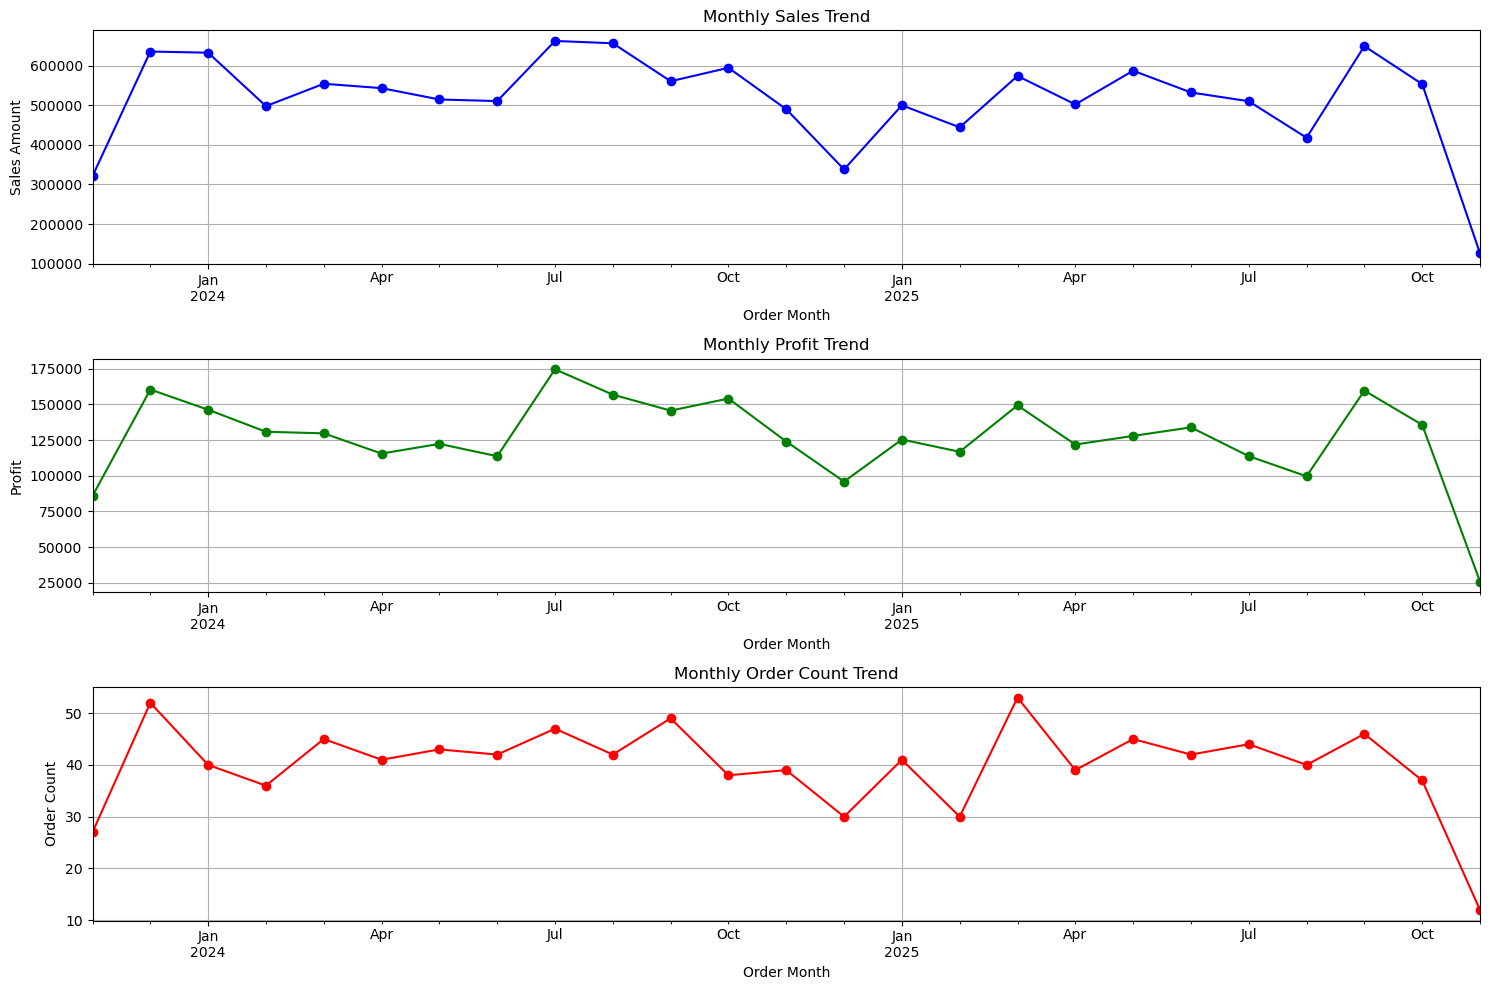

In [58]:
#Time Series Analysis
print("\n===REGIONAL PERFORMANCE ===\n")

#Extract time components
df['Order Month']=df['Order Date'].dt.to_period('M')
df['Order Year']=df['Order Date'].dt.year

#Monthly trends
monthly_trends=df.groupby('Order Month').agg({
    'Sales Amount':'sum',
    'Profit':'sum',
    'Order ID':'count'
}).rename(columns={'Order ID':'Order Count'})

print("Monthly Trends:")
print(monthly_trends.tail(10),'\n\n')

#Visualization
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
monthly_trends['Sales Amount'].plot(kind='line',color='blue',marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales Amount')
plt.grid(True)

plt.subplot(3,1,2)
monthly_trends['Profit'].plot(kind='line',color='green',marker='o')
plt.title('Monthly Profit Trend')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(3,1,3)
monthly_trends['Order Count'].plot(kind='line',color='red',marker='o')
plt.title('Monthly Order Count Trend')
plt.ylabel('Order Count')
plt.grid(True)

plt.tight_layout()
plt.show()


===REGIONAL PERFORMANCE ===

Correlation Matrix
              Quantity  Unit Price  Discount (%)  Sales Amount  Cost Price  \
Quantity      1.000000    0.040111     -0.043959      0.663226    0.656117   
Unit Price    0.040111    1.000000     -0.032315      0.677098    0.664653   
Discount (%) -0.043959   -0.032315      1.000000     -0.135707   -0.135553   
Sales Amount  0.663226    0.677098     -0.135707      1.000000    0.984496   
Cost Price    0.656117    0.664653     -0.135553      0.984496    1.000000   
Profit        0.571685    0.597952     -0.113390      0.875175    0.776744   

                Profit  
Quantity      0.571685  
Unit Price    0.597952  
Discount (%) -0.113390  
Sales Amount  0.875175  
Cost Price    0.776744  
Profit        1.000000   




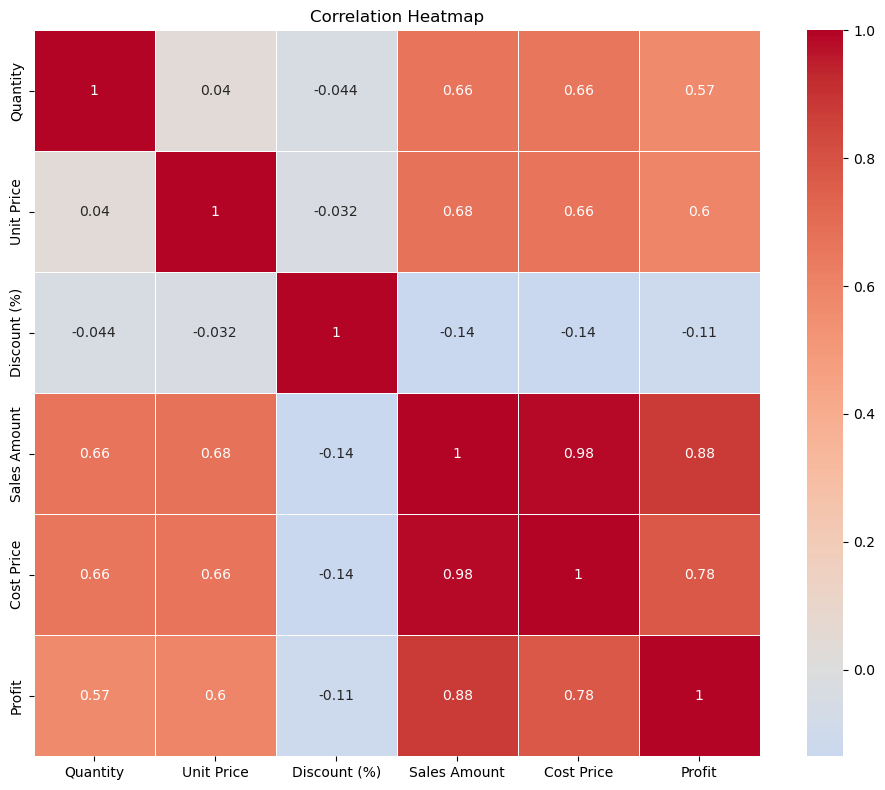

In [59]:
#Advanced Analysis
print("\n===ADVANCED ANALYSIS ===\n")

#Select numerical columns for correlation
numerical_df=df[['Quantity','Unit Price','Discount (%)','Sales Amount','Cost Price','Profit']]

#Correlation matrix
correlation_matrix=numerical_df.corr()
print("Correlation Matrix")
print(correlation_matrix,'\n\n')

#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,square=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


=== CUSTOMER SEGMENT ANALYSIS ===

                  Total Sales  Avg Sales  Total Profit  Avg Profit  \
Customer Segment                                                     
Consumer           4452528.10   13330.92    1098818.65     3289.88   
Corporate          4076783.55   12543.95     987562.65     3038.65   
Home Office        4372006.20   12821.13    1079725.87     3166.35   

                  Order Count  Avg Discount  
Customer Segment                             
Consumer                  334          9.57  
Corporate                 325         10.52  
Home Office               341         10.32   




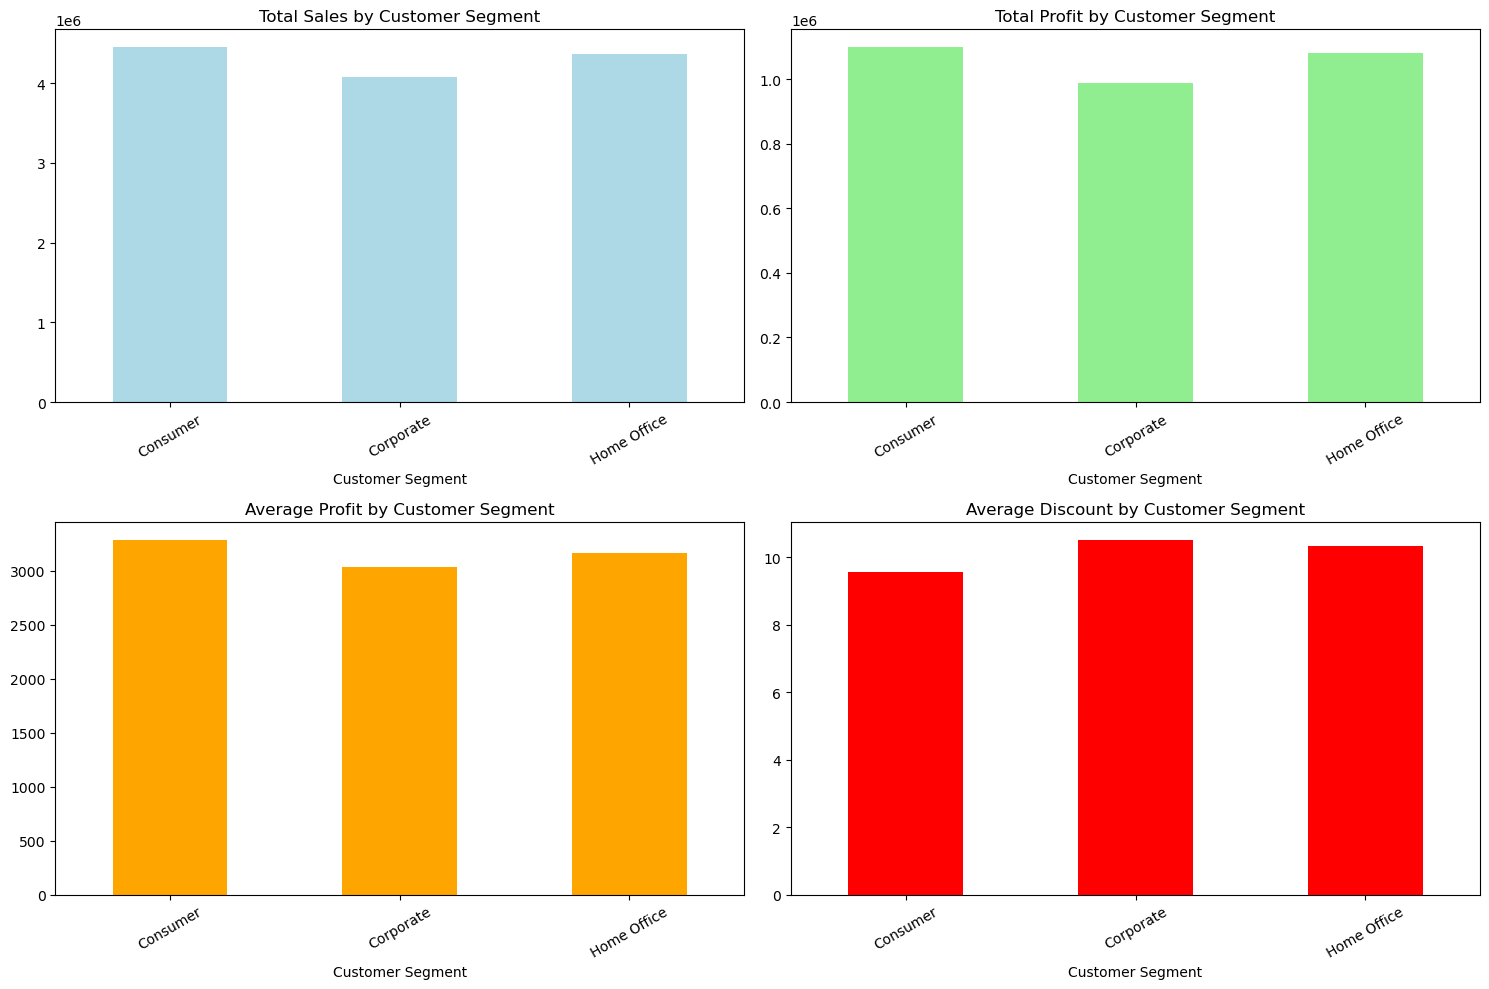

In [61]:
#Customer Segment Analysis
print("\n=== CUSTOMER SEGMENT ANALYSIS ===\n")

segment_analysis=df.groupby('Customer Segment').agg({
    'Sales Amount':['sum','mean'],
    'Profit':['sum','mean'],
    'Order ID':'count',
    'Discount (%)':'mean'
}).round(2)

segment_analysis.columns=['Total Sales','Avg Sales','Total Profit','Avg Profit','Order Count','Avg Discount']
print(segment_analysis,'\n\n')

#Visualization
fig,axes=plt.subplots(2,2,figsize=(15,10))

segment_analysis['Total Sales'].plot(kind='bar',ax=axes[0,0],color='lightblue')
axes[0,0].set_title('Total Sales by Customer Segment')
axes[0,0].tick_params(axis='x',rotation=30)

segment_analysis['Total Profit'].plot(kind='bar',ax=axes[0,1],color='lightgreen')
axes[0,1].set_title('Total Profit by Customer Segment')
axes[0,1].tick_params(axis='x',rotation=30)

segment_analysis['Avg Profit'].plot(kind='bar',ax=axes[1,0],color='orange')
axes[1,0].set_title('Average Profit by Customer Segment')
axes[1,0].tick_params(axis='x',rotation=30)

segment_analysis['Avg Discount'].plot(kind='bar',ax=axes[1,1],color='red')
axes[1,1].set_title('Average Discount by Customer Segment')
axes[1,1].tick_params(axis='x',rotation=30)

plt.tight_layout()
plt.show()

In [62]:
#Key insights and summary
#Overall Metrics
total_sales=df['Sales Amount'].sum()
total_profit=df['Profit'].sum()
total_orders=df['Order ID'].nunique()
avg_profit_margin=(total_profit/total_sales)*100

print(f"OVERALL PERFORMANCE:\n")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")

#Top Performing Categories
top_categories=df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(f"\nTOP PERFORMING CATEGORIES:\n")
for i, (category,profit) in enumerate(top_categories.items(),i):
    print(f"{i},{category}: ${profit:,.2f}")
    
#Regional Performance
best_region=df.groupby('Region')['Profit'].sum().idxmax()
print(f"\nBEST PERFORMING REGION: {best_region}")

#Delivery Performance
delivery_stats=df['Delivery Status'].value_counts(normalize=True)*100
print(f"\nDELIVERY STAUS:")
for status,percentage in delivery_stats.items():
    print(f"{status}: {percentage:.1f}%")
    
    #Customer Segments
    best_segment=df.groupby('Customer Segment')['Profit'].sum().idxmax()
    print(f"\nMOST PROFITABLE CUSTOMER SEGMENT: {best_segment}")

OVERALL PERFORMANCE:

Total Sales: $12,901,317.85
Total Profit: $3,166,107.17
Total Orders: 1000
Average Profit Margin: 24.54%

TOP PERFORMING CATEGORIES:

999,Electronics: $830,055.09
1000,Grocery: $800,115.85
1001,Office Supplies: $772,627.63
1002,Furniture: $763,308.60

BEST PERFORMING REGION: East

DELIVERY STAUS:
Pending: 26.1%

MOST PROFITABLE CUSTOMER SEGMENT: Consumer
Returned: 25.3%

MOST PROFITABLE CUSTOMER SEGMENT: Consumer
Cancelled: 24.8%

MOST PROFITABLE CUSTOMER SEGMENT: Consumer
Delivered: 23.8%

MOST PROFITABLE CUSTOMER SEGMENT: Consumer


In [65]:
#EXPORT RESULTS
analysis_results={
    'total_sales':total_sales,
    'total_profit':total_profit,
    'total_orders':total_orders,
    'avg_profit_margin':avg_profit_margin,
    'top_category':top_categories.index[0],
    'best_region':best_region,
    'best_customer_segment':best_segment
}

#Convert to dataframe and save
results_df=pd.DataFrame([analysis_results])
results_df.to_csv('eda_analysis_summary.csv',index=False)
print("\n Analysis Summary saved to 'eda_analysis_summary.csv'")


 Analysis Summary saved to 'eda_analysis_summary.csv'
